In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from IPython import display

from deep_shadow import *
from utils import *

%load_ext autoreload
%autoreload 2


## Loading dataset


In [2]:
cities = ['la', 'bos', 'nyc', 'chi', 'sp', 'bue',
          'joh', 'syd', 'tok', 'par', 'mex', 'sea', 'aus']

cities = ['la']
dates = ['winter', 'spring', 'summer']

zoom = 16
shadow_path = 'data/shadows/'
height_path = 'data/heights_new/'

# checkpoint_name = 'all-all'
checkpoint_name = 'pix2pix_la'
checkpoint_path = 'training_checkpoints/%s' % (checkpoint_name)

# TILES_PER_CITY = 270
# BATCH_SIZE = 2

TILES_PER_CITY = 50
BATCH_SIZE = 1

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
train_dataset, test_dataset = get_train_test(
    height_path, shadow_path, cities, dates, zoom, TILES_PER_CITY, BATCH_SIZE)

In [5]:
sample = next(iter(train_dataset))

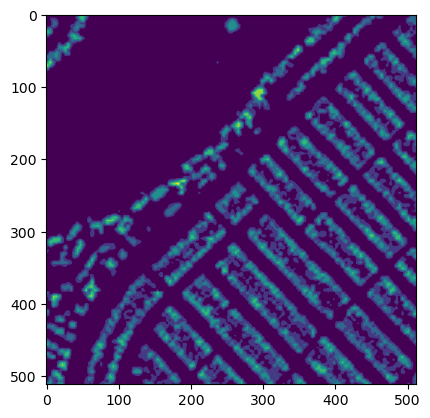

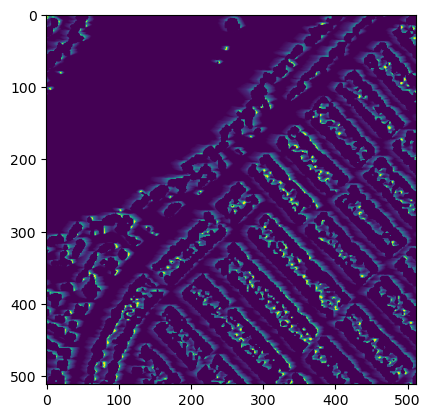

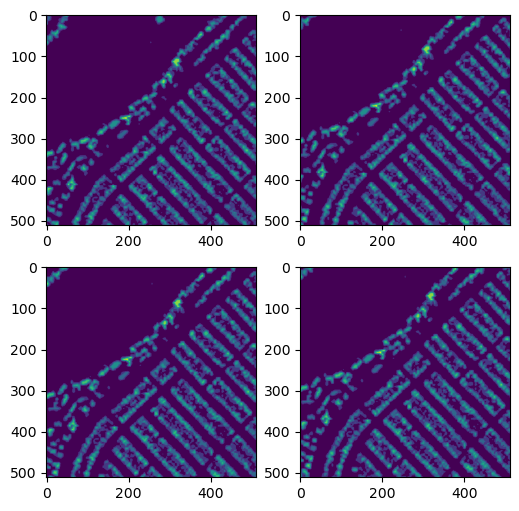

In [6]:
for inp, real, lat, dat in test_dataset.take(1):
    
    inp = inp[0]
    real = real[0]
    lat = lat[0]
    dat = dat[0]

plt.imshow((inp * 0.5 + 0.5) * 10)
plt.show()

plt.imshow((real * 0.5 + 0.5))
plt.show()

plt.figure(figsize=(6, 6))
for i in range(4):
    rj_inp, rj_re, rj_la, rj_da = random_jitter(inp, real, lat, dat)
    plt.subplot(2, 2, i + 1)
    plt.imshow((rj_inp * 0.5 + 0.5) * 10)
plt.show()


## Build generator and discriminator


In [7]:
deep_shadow = DeepShadow(512, 512)

In [9]:
# tf.keras.utils.plot_model(deep_shadow.generator, show_shapes=True, dpi=64)

## Generate images


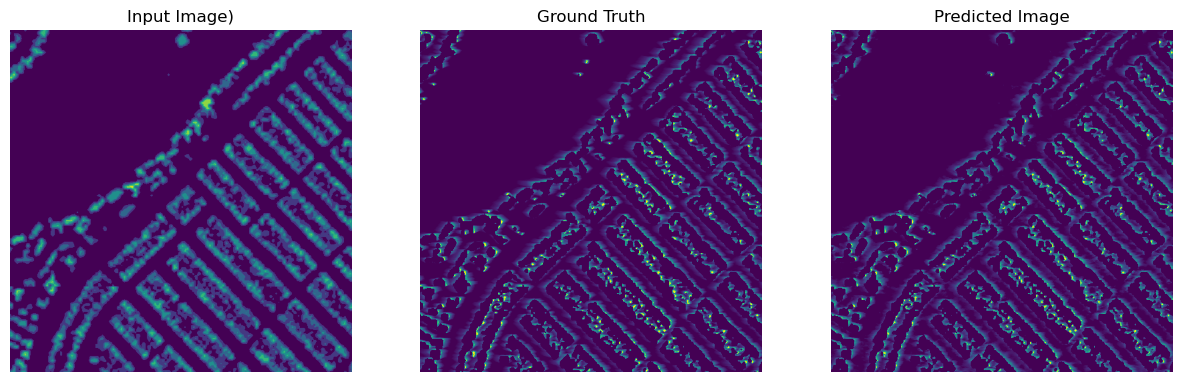

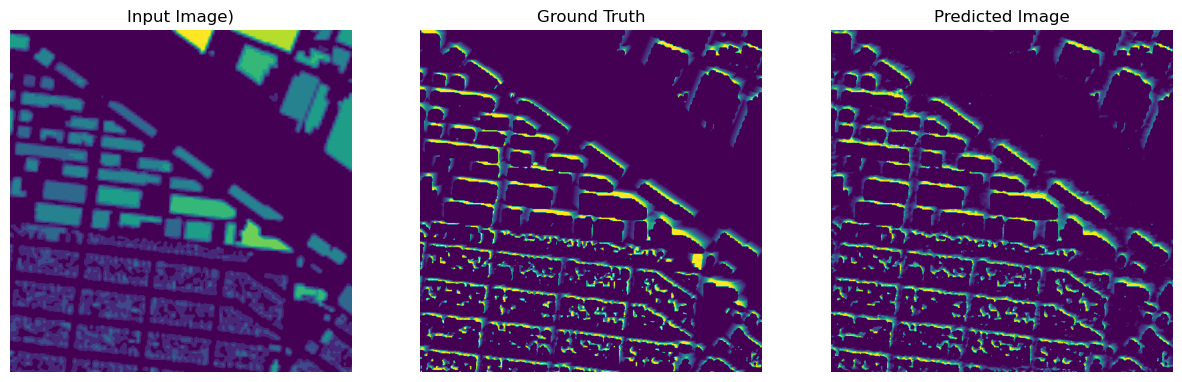

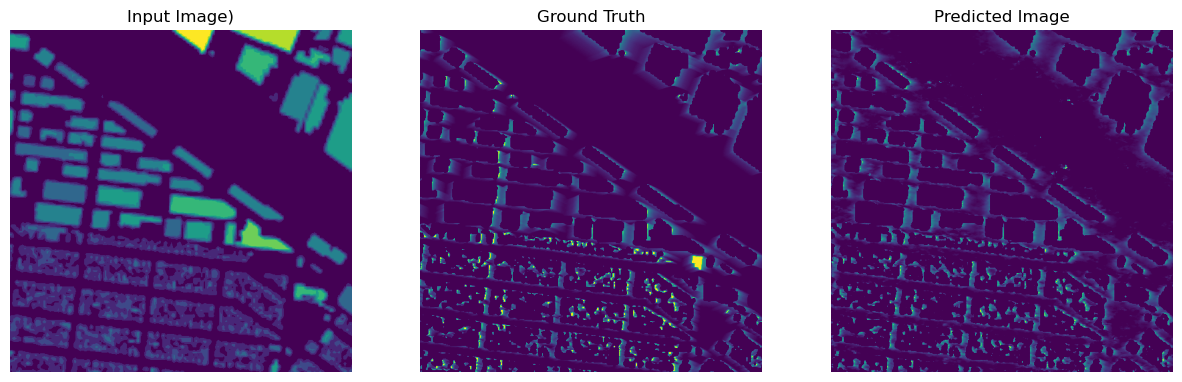

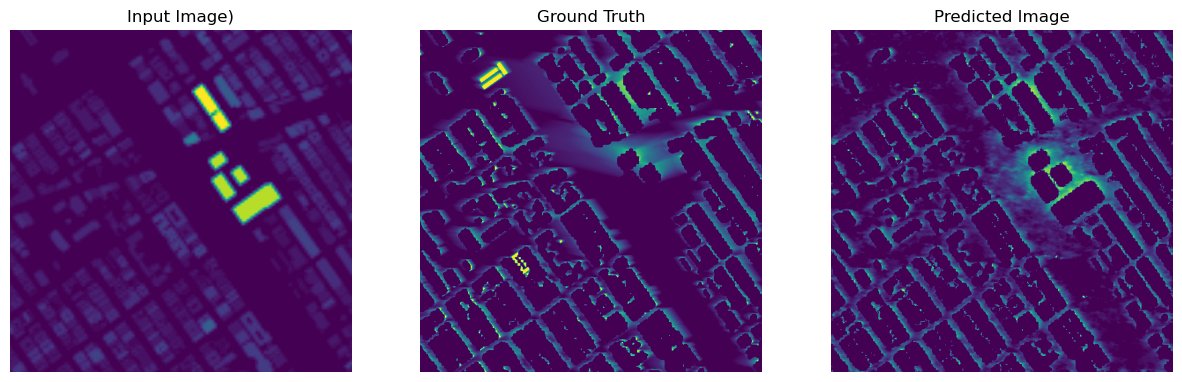

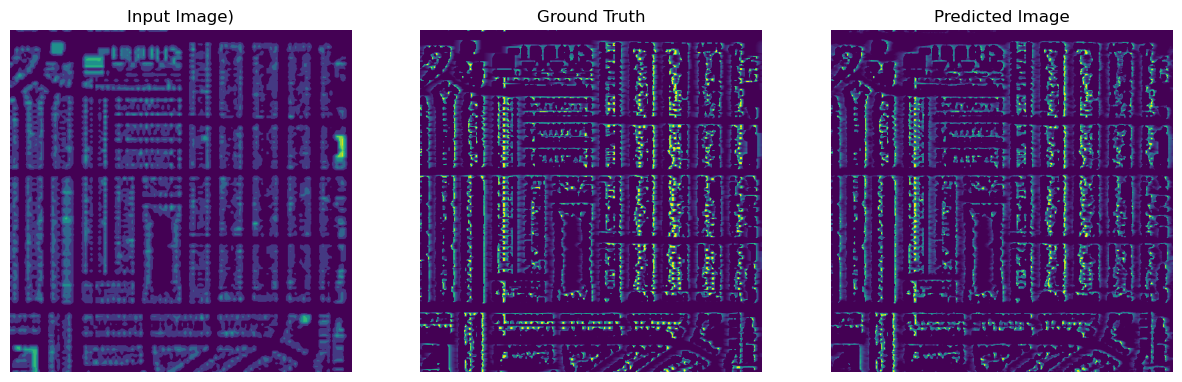

In [9]:
for example_input, example_target, example_lat, example_date in test_dataset.take(5):
    generate_images(deep_shadow.generator, example_input,
                    example_lat, example_date, example_target)

## Training


In [10]:
%load_ext tensorboard
%tensorboard --logdir logs --port 8089

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Time taken for 1000 steps: 95.83 sec



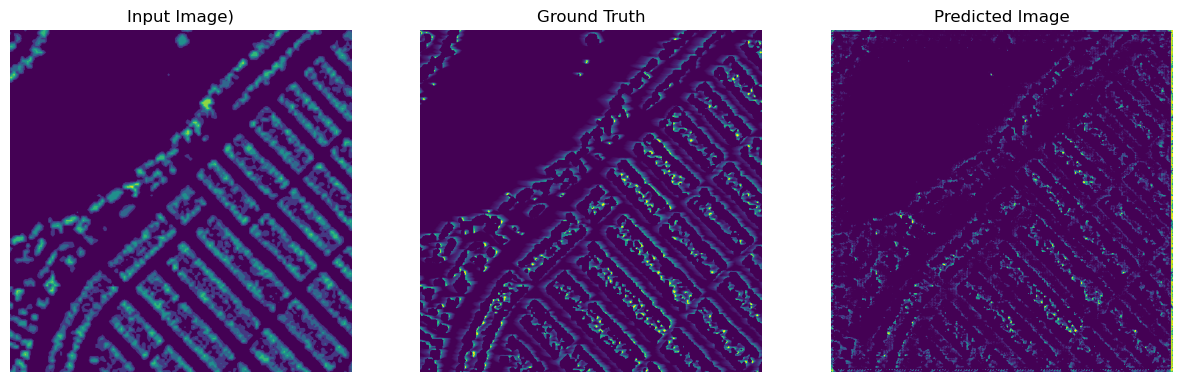

Step: 99k
....................................................................................................

In [8]:
deep_shadow.fit(checkpoint_path, train_dataset, test_dataset, 100000)

In [10]:
rmses, maes, mses = get_metrics(test_dataset, deep_shadow.generator)
    
print(np.average(rmses), np.average(maes))
df = pd.DataFrame({'rmse': rmses, 'mae': maes})

filepath = 'results/%s-%d.csv'%(checkpoint_name,zoom)
if not os.path.exists(os.path.dirname(filepath)):
    os.mkdir(os.path.dirname(filepath))
        
df.to_csv(filepath, index=False, header=True)

0.095933355 0.036009416
